In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

In [3]:
file_path = 'C:\SpringBoard\Waste_Management_Project\Dataset\Dataset.xlsx' 
waste_data = pd.read_excel(file_path)


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\athar\AppData\Local\Temp\ipykernel_26804\2033229203.py:1: SyntaxWarning: invalid escape sequence '\S'
  file_path = 'C:\SpringBoard\Waste_Management_Project\Dataset\Dataset.xlsx'


In [4]:
waste_data

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,3,2023-09-01 12:00:00,non_recyclable,0.90,0.12,0.47,16.27
1,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.00
2,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89
3,2,2023-09-01 12:45:00,organic,1.00,0.37,0.52,91.80
4,3,2023-09-01 13:00:00,recyclable,1.39,0.88,0.76,98.83
...,...,...,...,...,...,...,...
19995,4,2024-03-27 18:45:00,non_recyclable,1.30,0.41,0.46,58.57
19996,4,2024-03-27 19:00:00,non_recyclable,0.68,0.87,0.71,12.00
19997,3,2024-03-27 19:15:00,non_recyclable,1.12,0.79,0.07,29.03
19998,2,2024-03-27 19:30:00,organic,1.18,0.05,0.05,40.17


In [6]:
print("Initial Data Overview:")
print(waste_data.info())
print(waste_data.head())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   sensor_id            20000 non-null  int64         
 1   timestamp            20000 non-null  datetime64[ns]
 2   waste_type           20000 non-null  object        
 3   inductive_property   20000 non-null  float64       
 4   capacitive_property  20000 non-null  float64       
 5   moisture_property    20000 non-null  float64       
 6   infrared_property    20000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.1+ MB
None
   sensor_id           timestamp      waste_type  inductive_property  \
0          3 2023-09-01 12:00:00  non_recyclable                0.90   
1          4 2023-09-01 12:15:00      recyclable                1.18   
2          3 2023-09-01 12:30:00  non_recyclable      

In [7]:
print("\nMissing Values Before Handling:")
print(waste_data.isnull().sum())


Missing Values Before Handling:
sensor_id              0
timestamp              0
waste_type             0
inductive_property     0
capacitive_property    0
moisture_property      0
infrared_property      0
dtype: int64


In [8]:
waste_data['timestamp'] = pd.to_datetime(waste_data['timestamp'])

In [9]:
label_encoder = LabelEncoder()
waste_data['waste_type'] = label_encoder.fit_transform(waste_data['waste_type'])

In [10]:
waste_data

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,3,2023-09-01 12:00:00,0,0.90,0.12,0.47,16.27
1,4,2023-09-01 12:15:00,2,1.18,0.66,0.33,36.00
2,3,2023-09-01 12:30:00,0,0.87,0.14,0.83,58.89
3,2,2023-09-01 12:45:00,1,1.00,0.37,0.52,91.80
4,3,2023-09-01 13:00:00,2,1.39,0.88,0.76,98.83
...,...,...,...,...,...,...,...
19995,4,2024-03-27 18:45:00,0,1.30,0.41,0.46,58.57
19996,4,2024-03-27 19:00:00,0,0.68,0.87,0.71,12.00
19997,3,2024-03-27 19:15:00,0,1.12,0.79,0.07,29.03
19998,2,2024-03-27 19:30:00,1,1.18,0.05,0.05,40.17


In [11]:
numeric_columns = ['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']

In [12]:
z_scores = waste_data[numeric_columns].apply(zscore)

In [13]:
outlier_threshold = 3
outliers = (z_scores.abs() > outlier_threshold).any(axis=1)

In [14]:
print(f"\nNumber of Outliers Detected: {outliers.sum()}")


Number of Outliers Detected: 0


In [15]:
cleaned_data = waste_data[~outliers]

In [16]:
print("Original Data Shape:", waste_data.shape)
print("Cleaned Data Shape:", cleaned_data.shape)

Original Data Shape: (20000, 7)
Cleaned Data Shape: (20000, 7)


In [17]:
cleaned_data.columns = [col.lower().replace(" ", "_") for col in cleaned_data.columns]

In [18]:
cleaned_data.to_csv('cleaned_waste_data.csv', index=False)
print("\nData Preprocessing Complete!")


Data Preprocessing Complete!


In [19]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

Text(0, 0.5, 'Count')

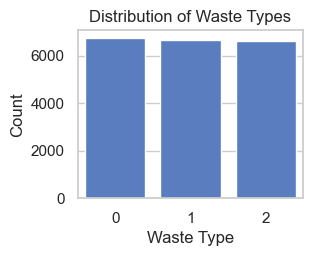

In [20]:
# 1. Distribution of waste types
plt.subplot(2, 2, 1)
sns.countplot(data=cleaned_data, x='waste_type')
plt.title('Distribution of Waste Types')
plt.xlabel('Waste Type')
plt.ylabel('Count')

C:\Users\athar\AppData\Local\Temp\ipykernel_26804\2458882548.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cleaned_data, x='timestamp', y='moisture_property', ci=None)


Text(0, 0.5, 'Moisture Property')

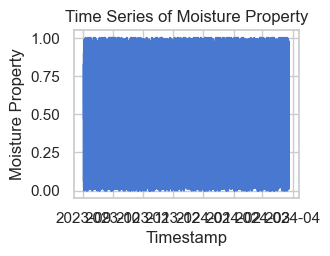

In [21]:
# 2. Time-series trend of a property
plt.subplot(2, 2, 2)
sns.lineplot(data=cleaned_data, x='timestamp', y='moisture_property', ci=None)
plt.title('Time Series of Moisture Property')
plt.xlabel('Timestamp')
plt.ylabel('Moisture Property')

Text(0.5, 1.0, 'Correlation Heatmap')

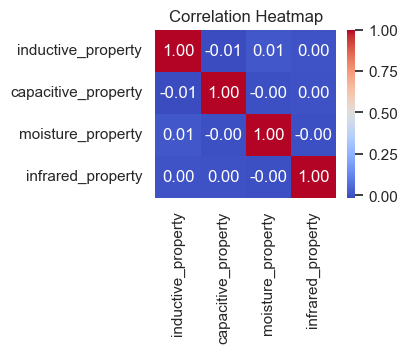

In [22]:
# 3. Correlation heatmap
plt.subplot(2, 2, 3)
corr = cleaned_data[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')

Text(0, 0.5, 'Inductive Property')

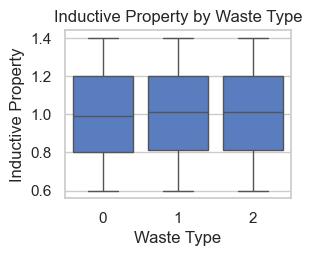

In [23]:
# 4. Boxplot for waste properties by type
plt.subplot(2, 2, 4)
sns.boxplot(data=cleaned_data, x='waste_type', y='inductive_property')
plt.title('Inductive Property by Waste Type')
plt.xlabel('Waste Type')
plt.ylabel('Inductive Property')


In [25]:
# Show all plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>